In [ ]:
%matplotlib inline

# Compute Ripley\'s statistics

This example shows how to compute the Ripley\'s L function.

The Ripley\'s L function is a descriptive statistics generally used to
determine whether points have a random, dispersed or clustered
distribution pattern at certain scale. The Ripley\'s L is a
variance-normalized version of the Ripley\'s K statistic.

::: seealso
See `sphx_glr_auto_examples_graph_compute_co_occurrence.py` for another
score to describe spatial patterns with `squidpy.gr.co_occurrence`.
:::


In [1]:
import squidpy as sq

adata = sq.datasets.slideseqv2()
adata

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 251M/251M [01:17<00:00, 3.39MB/s]


AnnData object with n_obs × n_vars = 41786 × 4000
    obs: 'barcode', 'x', 'y', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_MT', 'log1p_total_counts_MT', 'pct_counts_MT', 'n_counts', 'leiden', 'cluster'
    var: 'MT', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'cluster_colors', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'spatial_neighbors', 'umap'
    obsm: 'X_pca', 'X_umap', 'deconvolution_results', 'spatial'
    varm: 'PCs'
    obsp: 'connectivities', 'distances', 'spatial_connectivities', 'spatial_distances'

We can compute the Ripley\'s L function with `squidpy.gr.ripley`.
Results can be visualized with `squidpy.pl.ripley`.


/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/squidpy/pl/_graph.py:307: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(y="stats", x="bins", ci="sd", alpha=0.01, color="gray", data=res["sims_stat"], ax=ax)


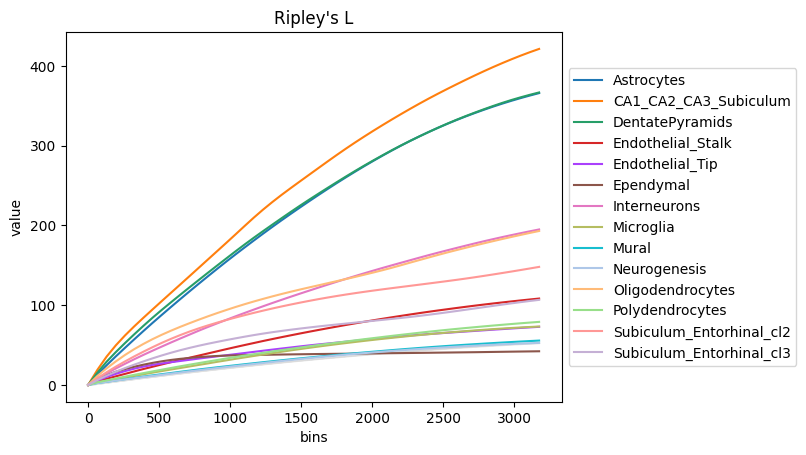

In [2]:
mode = "L"
sq.gr.ripley(adata, cluster_key="cluster", mode=mode)
sq.pl.ripley(adata, cluster_key="cluster", mode=mode)

We can further visualize tissue organization in spatial coordinates with
`squidpy.pl.spatial_scatter`.


/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


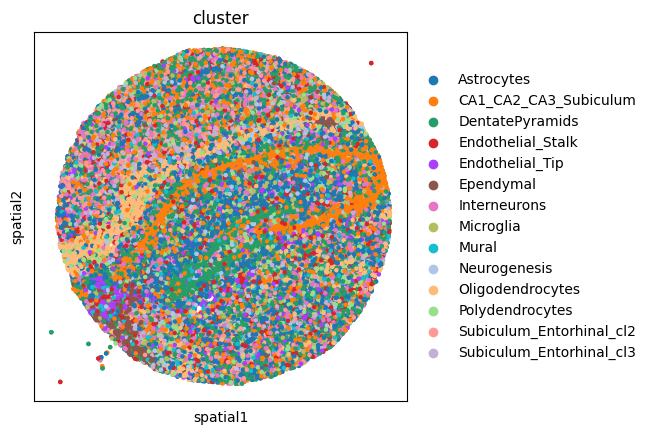

In [3]:
sq.pl.spatial_scatter(adata, color="cluster", size=20, shape=None)

There are also 2 other Ripley\'s statistics available (that are closely
related): `mode = 'F'` and `mode = 'G'`.


In [14]:
adata[[1,2,3], [1,2,3]]

View of AnnData object with n_obs × n_vars = 3 × 3
    obs: 'barcode', 'x', 'y', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_MT', 'log1p_total_counts_MT', 'pct_counts_MT', 'n_counts', 'leiden', 'cluster'
    var: 'MT', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'cluster_colors', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'spatial_neighbors', 'umap', 'cluster_ripley_L'
    obsm: 'X_pca', 'X_umap', 'deconvolution_results', 'spatial'
    varm: 'PCs'
    obsp: 'connectivities', 'distances', 'spatial_connectivities', 'spatial_distances'

In [44]:
adata.obs

,barcode,x,y,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,total_counts_MT,log1p_total_counts_MT,pct_counts_MT,n_counts,leiden,cluster
AACGTCATAATCGT,AACGTCATAATCGT,888.95,3219.5,6539,8.785692,23772.0,10.076305,16.902238,22.311964,29.559987,42.756184,958.0,6.865891,4.029951,23772.0,0,DentatePyramids
TACTTTAGCGCAGT,TACTTTAGCGCAGT,4762.20,5020.4,6017,8.702510,19661.0,9.886443,19.744672,24.698642,31.488734,44.428056,1579.0,7.365180,8.031128,19661.0,6,CA1_CA2_CA3_Subiculum
CATGCCTGGGTTCG,CATGCCTGGGTTCG,886.50,3199.6,5319,8.579229,15999.0,9.680344,16.463529,22.182636,29.776861,43.990249,707.0,6.562444,4.419026,15999.0,0,DentatePyramids
TCGATATGGCACAA,TCGATATGGCACAA,2237.10,5144.6,5554,8.622454,15069.0,9.620461,13.783264,19.092176,26.212755,40.467184,544.0,6.300786,3.610060,15069.0,6,DentatePyramids
TTATCTGACGAAGC,TTATCTGACGAAGC,1031.80,2425.2,4946,8.506537,14013.0,9.547812,16.984229,22.664669,30.207664,44.287447,681.0,6.525030,4.859773,14013.0,0,Subiculum_Entorhinal_cl2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CACCCGATGACTCC,CACCCGATGACTCC,4314.40,1770.1,100,4.615121,120.0,4.795791,58.333333,100.000000,100.000000,100.000000,6.0,1.945910,5.000000,120.0,3,Polydendrocytes
CTTGATTAGGCAGG,CTTGATTAGGCAGG,1452.50,3013.1,108,4.691348,127.0,4.852030,54.330709,93.700787,100.000000,100.000000,20.0,3.044523,15.748032,127.0,1,Interneurons
GAGTTCCTAAGCGG,GAGTTCCTAAGCGG,3090.10,2045.0,103,4.644391,114.0,4.744932,53.508772,97.368421,100.000000,100.000000,6.0,1.945910,5.263158,114.0,1,DentatePyramids
GCGCTCAGTGCTCT,GCGCTCAGTGCTCT,3304.10,3491.5,112,4.727388,115.0,4.753590,46.086957,89.565217,100.000000,100.000000,4.0,1.609438,3.478261,115.0,7,Interneurons


In [40]:
adata.obs[["x", "y", "cluster"]].to_csv("/Users/brendan/Desktop/PostDoc/work/HuBMAP/repos/multiscale_celltype_colocalization_analysis/data/squidpy/compute_ripley_data.csv")

In [27]:
adata

AnnData object with n_obs × n_vars = 41786 × 4000
    obs: 'barcode', 'x', 'y', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_MT', 'log1p_total_counts_MT', 'pct_counts_MT', 'n_counts', 'leiden', 'cluster'
    var: 'MT', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'cluster_colors', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'spatial_neighbors', 'umap', 'cluster_ripley_L'
    obsm: 'X_pca', 'X_umap', 'deconvolution_results', 'spatial'
    varm: 'PCs'
    obsp: 'connectivities', 'distances', 'spatial_connectivities', 'spatial_distances'

In [31]:
adata.var

,MT,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts,n_cells,highly_variable,highly_variable_rank,means,variances,variances_norm
1010001B22Rik,False,37,0.000771,0.000770,99.930462,41.0,3.737670,37,True,2374.0,0.000981,0.001172,1.088838
1110002J07Rik,False,17,0.000395,0.000395,99.968050,21.0,3.091043,17,True,440.0,0.000503,0.000790,1.455999
1110017D15Rik,False,521,0.012291,0.012216,99.020824,654.0,6.484635,518,True,515.0,0.015555,0.025652,1.411067
1190002F15Rik,False,24,0.000489,0.000489,99.954894,26.0,3.295837,24,True,3061.0,0.000622,0.000718,1.061956
1300017J02Rik,False,46,0.001015,0.001014,99.913547,54.0,4.007333,45,True,1076.0,0.001268,0.001698,1.211797
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zscan10,False,10,0.000207,0.000207,99.981206,11.0,2.484907,10,True,1705.0,0.000263,0.000311,1.132872
Zswim3,False,205,0.004154,0.004145,99.614720,221.0,5.402678,202,True,3794.0,0.005193,0.006171,1.039258
Zswim5,False,310,0.006841,0.006818,99.417381,364.0,5.899898,308,True,1069.0,0.008639,0.012059,1.212995
Zswim6,False,822,0.017309,0.017161,98.455120,921.0,6.826545,811,True,2407.0,0.021706,0.027745,1.087119


In [33]:
adata.to_df()

,1010001B22Rik,1110002J07Rik,1110017D15Rik,1190002F15Rik,1300017J02Rik,1500012K07Rik,1500015O10Rik,1500017E21Rik,1600002K03Rik,1700001C02Rik,...,Zmym5,Zmym6,Zmynd10,Znhit6,Znrf3,Zscan10,Zswim3,Zswim5,Zswim6,Zwilch
AACGTCATAATCGT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.018023,0.035727,0.0,...,0.070221,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
TACTTTAGCGCAGT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.021745,0.021745,0.0,0.021745,0.021745,0.0,0.0,0.0,0.000000,0.000000
CATGCCTGGGTTCG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.026649,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
TCGATATGGCACAA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.028285,0.000000
TTATCTGACGAAGC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.030382,0.000000,0.0,0.030382,0.000000,0.0,0.0,0.0,0.000000,0.030382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CACCCGATGACTCC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
CTTGATTAGGCAGG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
GAGTTCCTAAGCGG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
GCGCTCAGTGCTCT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000


In [47]:
sq.gr.co_occurrence(adata, cluster_key="cluster")

/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 231/231 [01:24<00:00,  2.73/s]


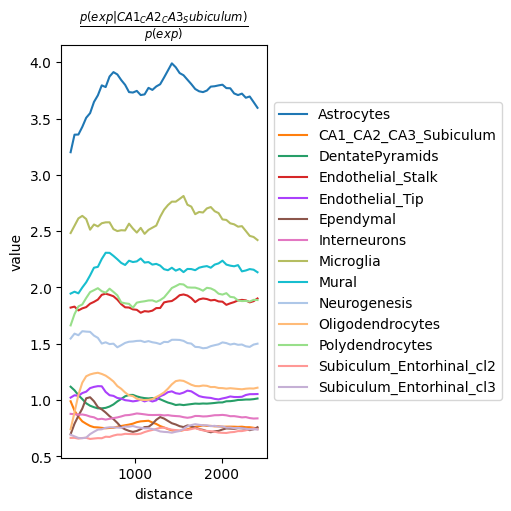

In [48]:
sq.pl.co_occurrence(adata, cluster_key="cluster", clusters="CA1_CA2_CA3_Subiculum")

In [50]:
import pandas as pd

load in the shuffled dataset and recompute co-occurance

In [60]:
meta_ripley = pd.read_csv("/Users/brendan/Desktop/PostDoc/work/HuBMAP/repos/multiscale_celltype_colocalization_analysis/data/squidpy/ripley.meta.csv",
                          sep=";")

meta_ripley

,Unnamed: 0,x,y,cluster,shuffled
0,AACGTCATAATCGT,"888,95","3219,5",DentatePyramids,Interneurons
1,TACTTTAGCGCAGT,"4762,2","5020,4",CA1_CA2_CA3_Subiculum,Astrocytes
2,CATGCCTGGGTTCG,"886,5","3199,6",DentatePyramids,Astrocytes
3,TCGATATGGCACAA,"2237,1","5144,6",DentatePyramids,Endothelial_Stalk
4,TTATCTGACGAAGC,"1031,8","2425,2",Subiculum_Entorhinal_cl2,CA1_CA2_CA3_Subiculum
...,...,...,...,...,...
41781,CACCCGATGACTCC,"4314,4","1770,1",Polydendrocytes,Oligodendrocytes
41782,CTTGATTAGGCAGG,"1452,5","3013,1",Interneurons,DentatePyramids
41783,GAGTTCCTAAGCGG,"3090,1",2045,DentatePyramids,Polydendrocytes
41784,GCGCTCAGTGCTCT,"3304,1","3491,5",Interneurons,Astrocytes


In [67]:
adata.obs["shuffled"] = pd.Categorical(meta_ripley["shuffled"])

In [68]:
adata.obs

,barcode,x,y,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,total_counts_MT,log1p_total_counts_MT,pct_counts_MT,n_counts,leiden,cluster,shuffled
AACGTCATAATCGT,AACGTCATAATCGT,888.95,3219.5,6539,8.785692,23772.0,10.076305,16.902238,22.311964,29.559987,42.756184,958.0,6.865891,4.029951,23772.0,0,DentatePyramids,Interneurons
TACTTTAGCGCAGT,TACTTTAGCGCAGT,4762.20,5020.4,6017,8.702510,19661.0,9.886443,19.744672,24.698642,31.488734,44.428056,1579.0,7.365180,8.031128,19661.0,6,CA1_CA2_CA3_Subiculum,Astrocytes
CATGCCTGGGTTCG,CATGCCTGGGTTCG,886.50,3199.6,5319,8.579229,15999.0,9.680344,16.463529,22.182636,29.776861,43.990249,707.0,6.562444,4.419026,15999.0,0,DentatePyramids,Astrocytes
TCGATATGGCACAA,TCGATATGGCACAA,2237.10,5144.6,5554,8.622454,15069.0,9.620461,13.783264,19.092176,26.212755,40.467184,544.0,6.300786,3.610060,15069.0,6,DentatePyramids,Endothelial_Stalk
TTATCTGACGAAGC,TTATCTGACGAAGC,1031.80,2425.2,4946,8.506537,14013.0,9.547812,16.984229,22.664669,30.207664,44.287447,681.0,6.525030,4.859773,14013.0,0,Subiculum_Entorhinal_cl2,CA1_CA2_CA3_Subiculum
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CACCCGATGACTCC,CACCCGATGACTCC,4314.40,1770.1,100,4.615121,120.0,4.795791,58.333333,100.000000,100.000000,100.000000,6.0,1.945910,5.000000,120.0,3,Polydendrocytes,Oligodendrocytes
CTTGATTAGGCAGG,CTTGATTAGGCAGG,1452.50,3013.1,108,4.691348,127.0,4.852030,54.330709,93.700787,100.000000,100.000000,20.0,3.044523,15.748032,127.0,1,Interneurons,DentatePyramids
GAGTTCCTAAGCGG,GAGTTCCTAAGCGG,3090.10,2045.0,103,4.644391,114.0,4.744932,53.508772,97.368421,100.000000,100.000000,6.0,1.945910,5.263158,114.0,1,DentatePyramids,Polydendrocytes
GCGCTCAGTGCTCT,GCGCTCAGTGCTCT,3304.10,3491.5,112,4.727388,115.0,4.753590,46.086957,89.565217,100.000000,100.000000,4.0,1.609438,3.478261,115.0,7,Interneurons,Astrocytes


/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


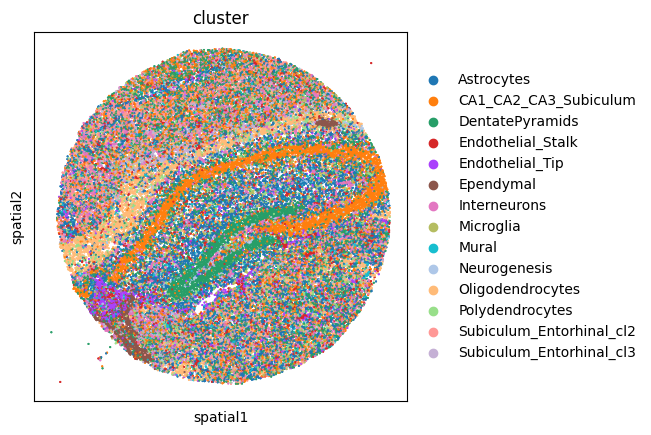

In [73]:
sq.pl.spatial_scatter(adata, color="cluster", size=1, shape=None)

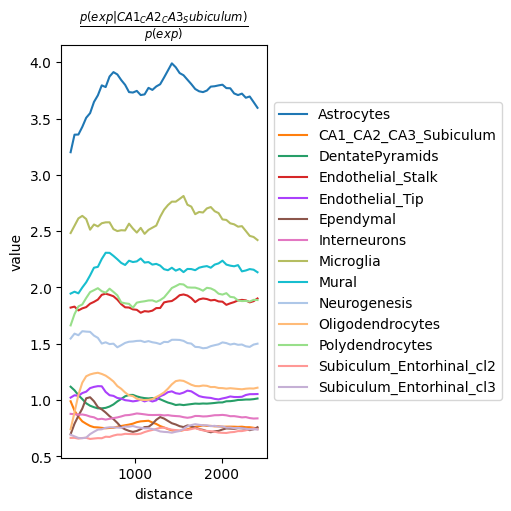

In [69]:
sq.pl.co_occurrence(adata, cluster_key="cluster", clusters="CA1_CA2_CA3_Subiculum")

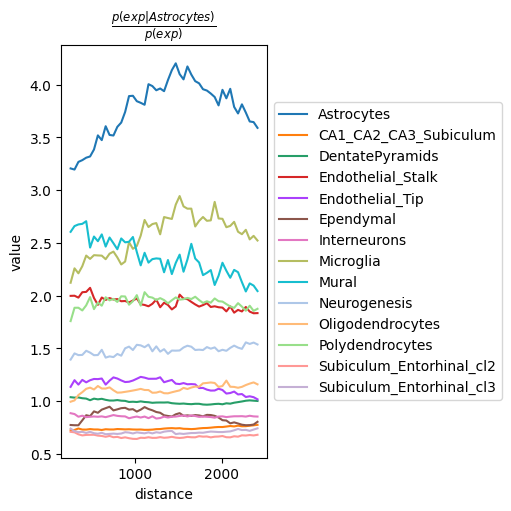

In [280]:
sq.pl.co_occurrence(adata, cluster_key="cluster", clusters="Astrocytes")

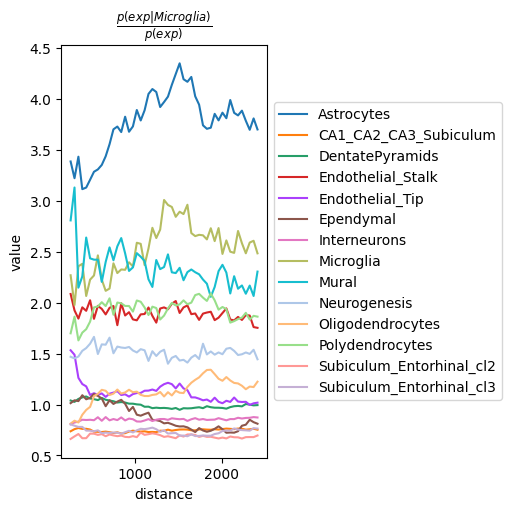

In [281]:
sq.pl.co_occurrence(adata, cluster_key="cluster", clusters="Microglia")

In [ ]:
sq.gr.spatial_neighbors(adata, coord_type="generic")

In [71]:
sq.gr.co_occurrence(adata, cluster_key="shuffled")

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 231/231 [01:23<00:00,  2.75/s]


ERROR: Unable to fetch palette, reason: 'shuffled_colors'. Using `None`.


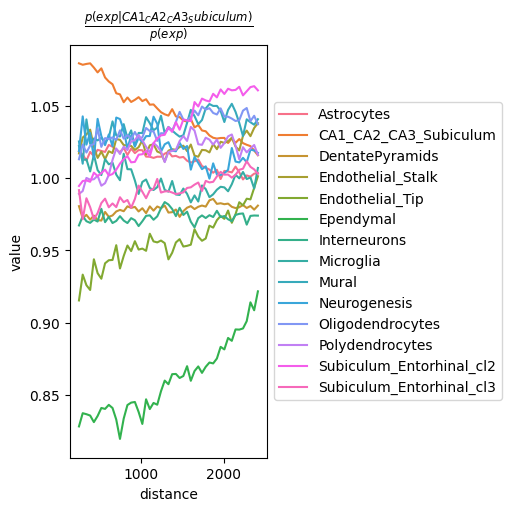

In [72]:
sq.pl.co_occurrence(adata, cluster_key="shuffled", clusters="CA1_CA2_CA3_Subiculum")

/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


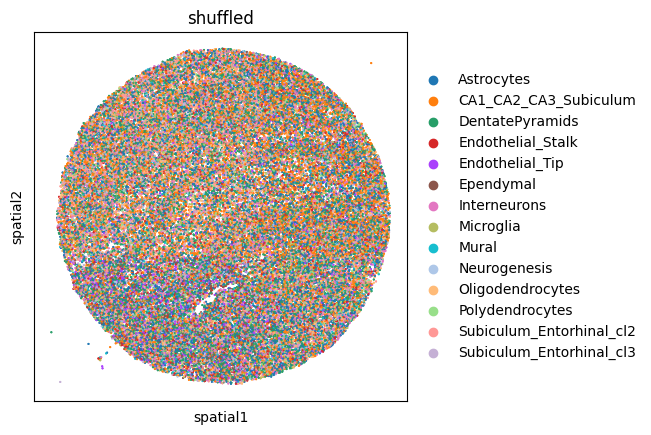

In [74]:
sq.pl.spatial_scatter(adata, color="shuffled", size=1, shape=None)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 120.11/s]


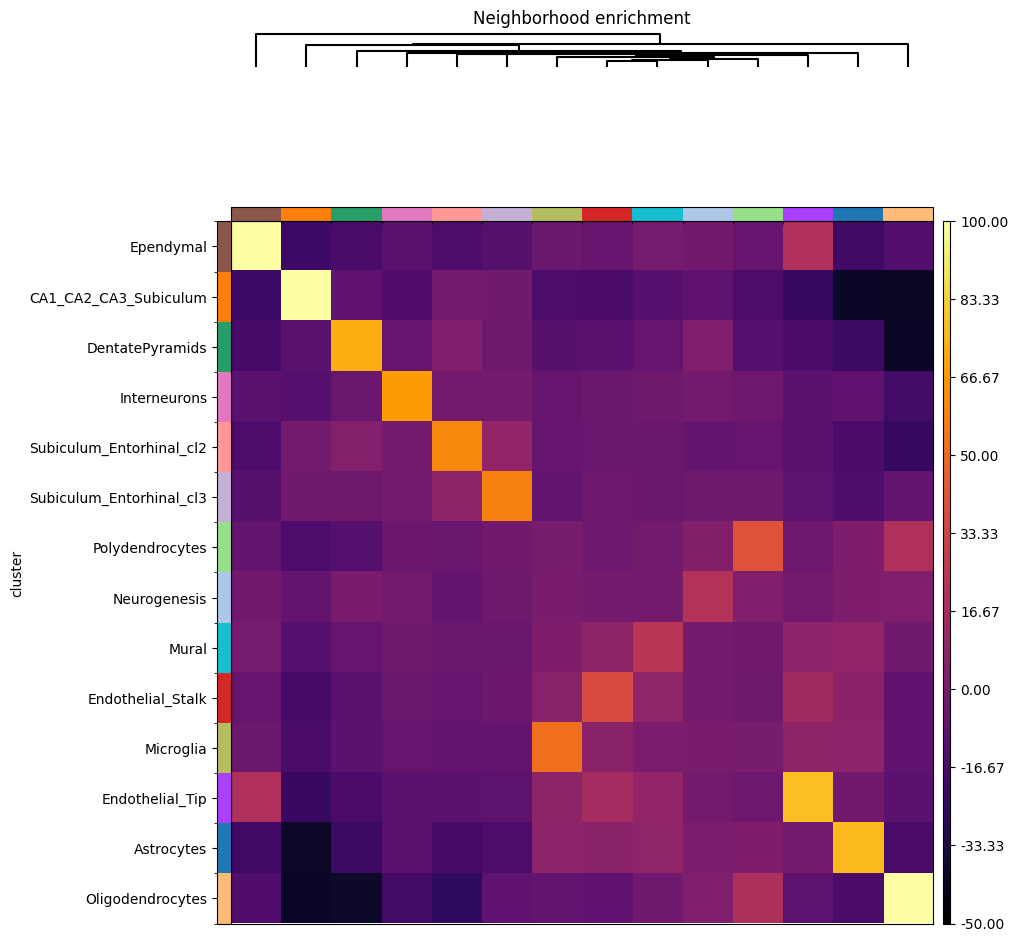

In [282]:
sq.gr.spatial_neighbors(adata, coord_type="generic")
sq.gr.nhood_enrichment(adata, cluster_key="cluster")
sq.pl.nhood_enrichment(adata, cluster_key="cluster", method="single", cmap="inferno", vmin=-50, vmax=100)

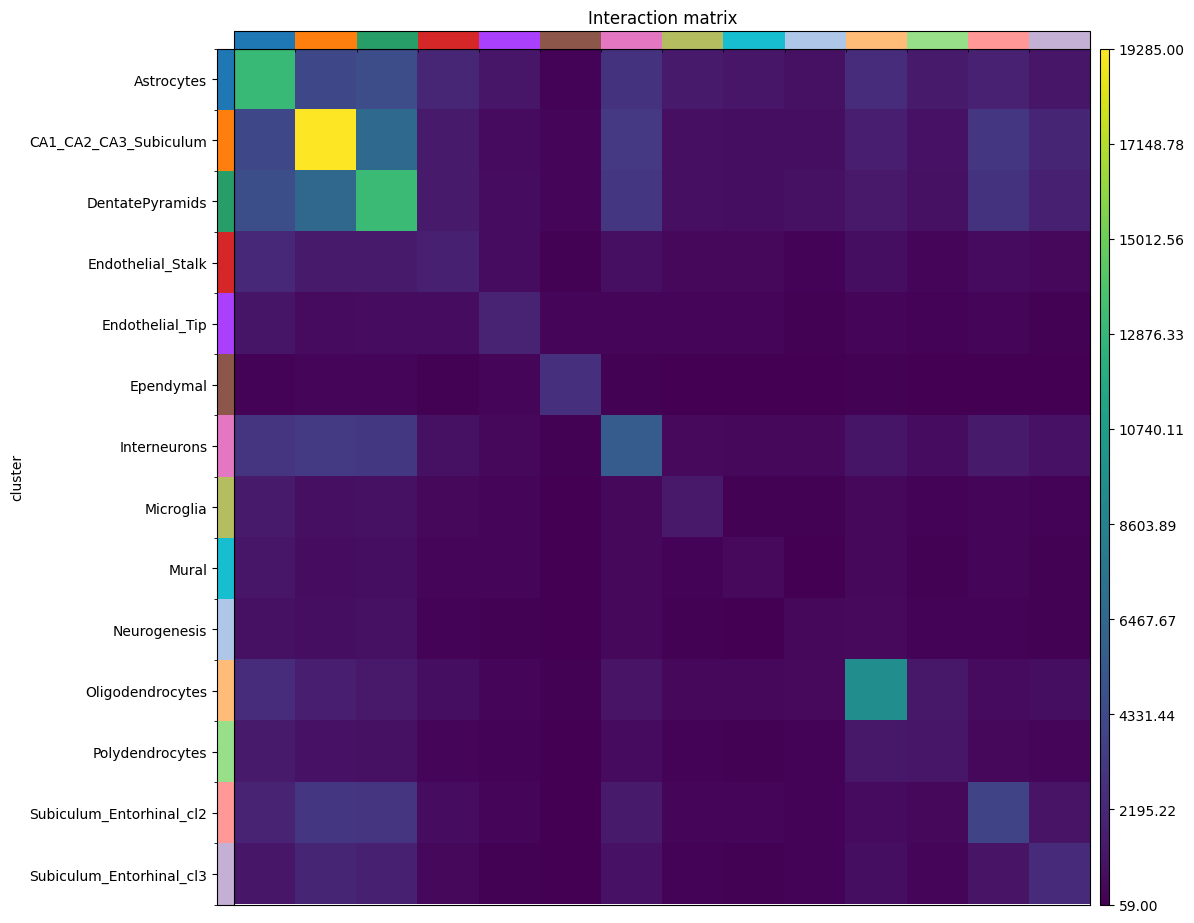

In [284]:
sq.gr.interaction_matrix(adata, cluster_key="cluster", normalized=False)
sq.pl.interaction_matrix(adata, cluster_key="cluster")

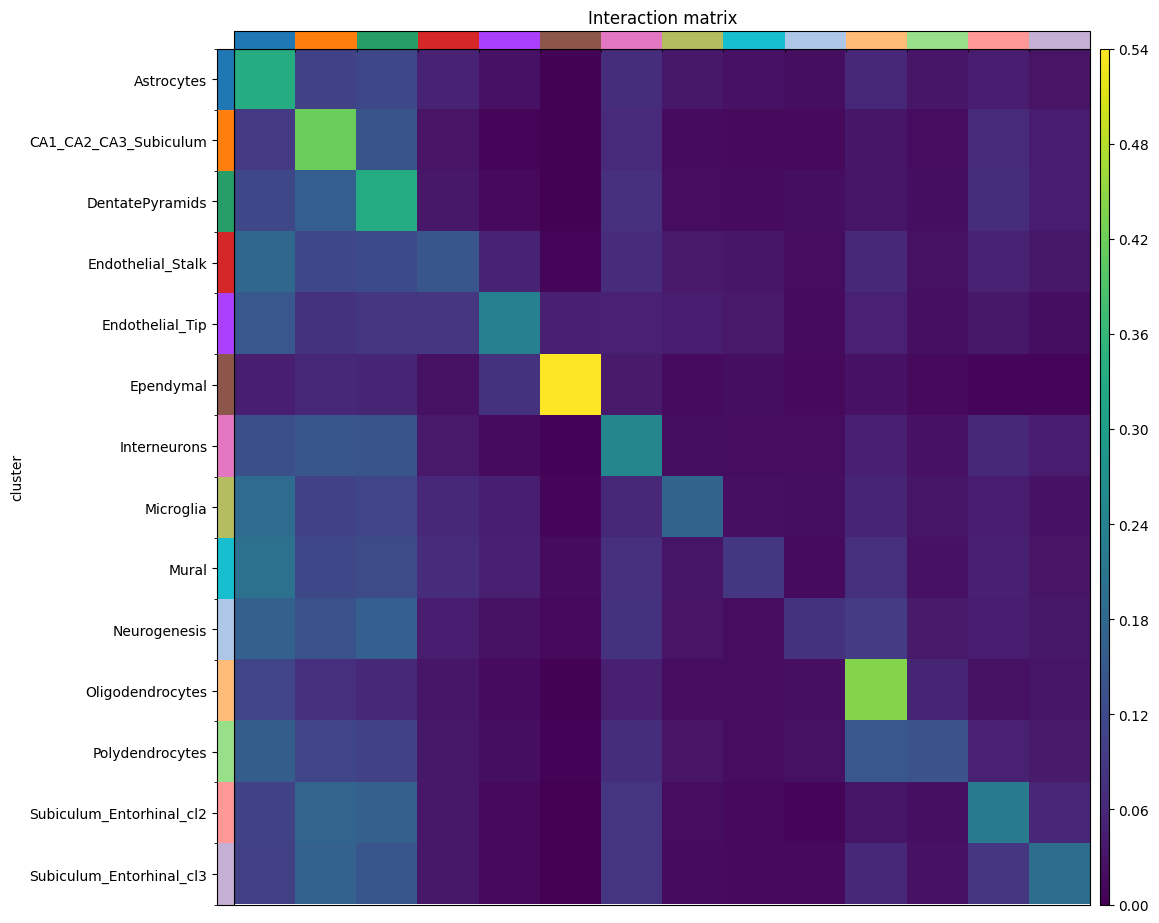

In [285]:
sq.gr.interaction_matrix(adata, cluster_key="cluster", normalized=True)
sq.pl.interaction_matrix(adata, cluster_key="cluster")

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 102.26/s]


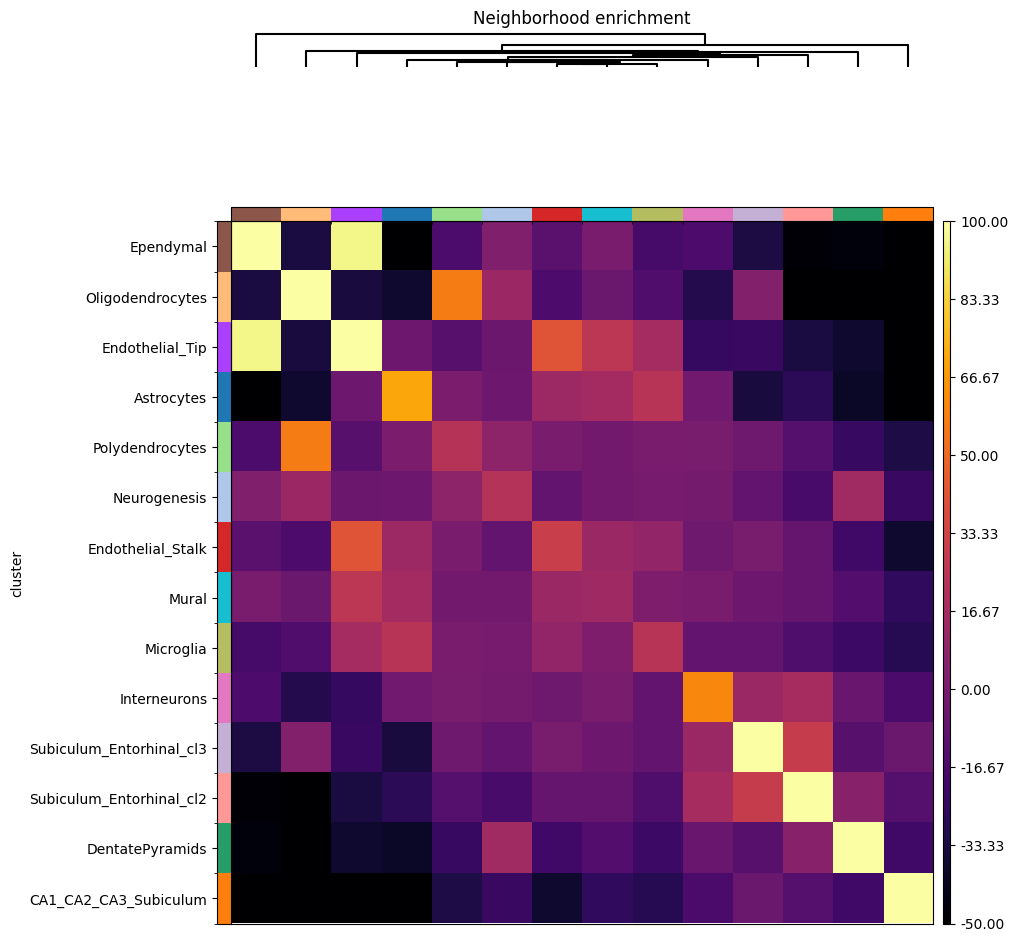

In [287]:
sq.gr.spatial_neighbors(adata, coord_type="generic", radius=100, key_added='spatial_distances')
sq.gr.nhood_enrichment(adata, cluster_key="cluster", connectivity_key='spatial_distances')
sq.pl.nhood_enrichment(adata, cluster_key="cluster", method="single", cmap="inferno", vmin=-50, vmax=100)

using radius of 100 which is kind of like my way of defining neighbors. Then this is the global result. 

So why does using the immediate neighbors seem to yeild different results than this distance? Or does it? In terms of the conflicting results between this and multiscale, maybe I am thinking of the co-occurance metric

These results might actually be closer to mine but they only reveal wrt the global shuffling in their permutation tests

And I also deal with subsets

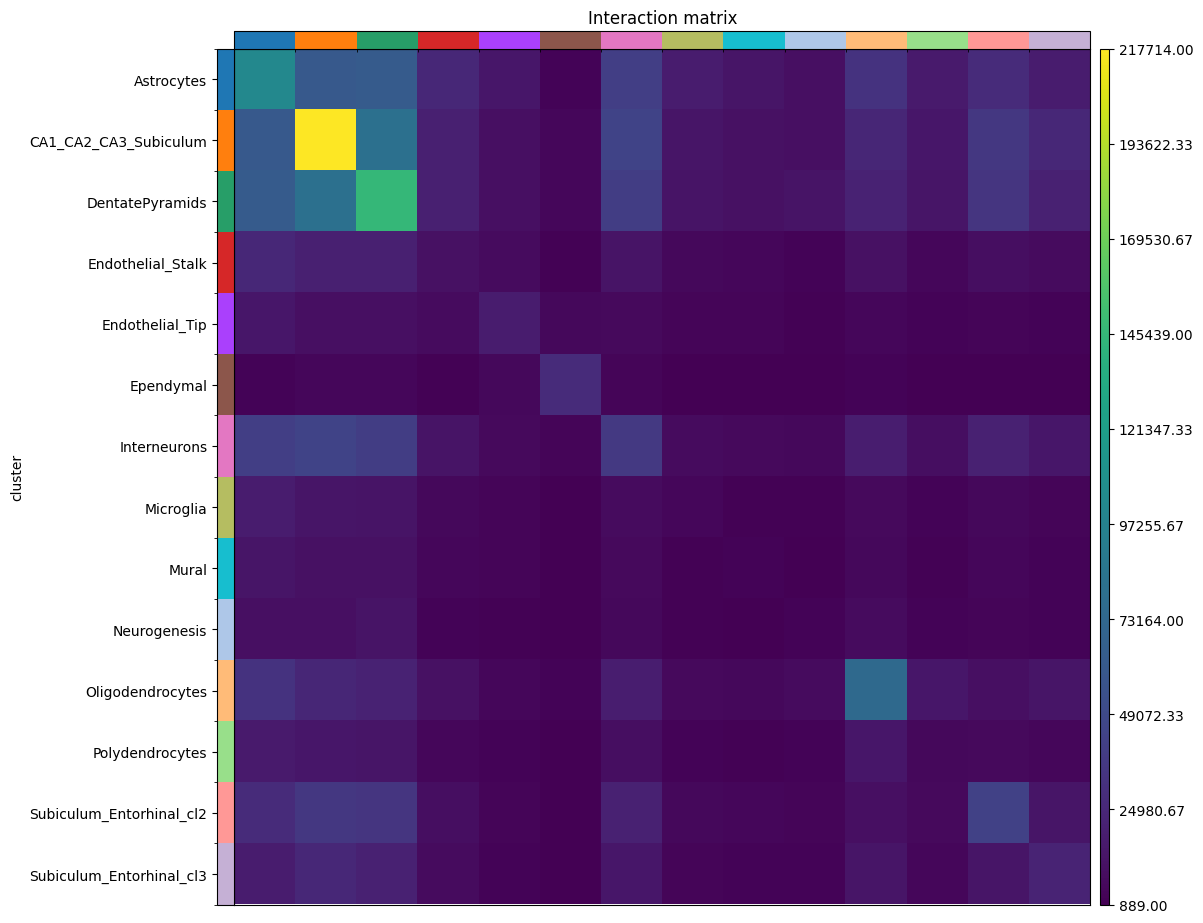

In [289]:
sq.gr.interaction_matrix(adata, cluster_key="cluster", normalized=False, connectivity_key='spatial_distances')
sq.pl.interaction_matrix(adata, cluster_key="cluster")

the using spatial distances of 100 similar to me doesnt really change this plot just more overall connections

In [91]:
adata.uns["cluster_co_occurrence"]["interval"].shape

(50,)

In [105]:
four_i = sq.datasets.four_i()

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 173M/173M [00:44<00:00, 4.12MB/s]
/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [106]:
four_i.obs

,x,y,is_nucleous,is_cytplasm,cell_id,leiden,cluster
908860,1777,1201,False,True,140,1,Cell_periphery_1
682735,1447,982,True,False,118,5,Nucleus
806699,2089,1104,False,True,136,7,Endosomes_golgi_1
790375,1306,1089,True,False,127,0,Nucleolus
835641,1902,1133,False,True,142,4,ER_mitochondria_2
...,...,...,...,...,...,...,...
961485,1364,1246,False,True,143,1,Cell_periphery_1
806705,2095,1104,False,True,136,7,Endosomes_golgi_1
603424,1386,909,False,True,118,2,Cell_periphery_2
839951,2033,1137,True,False,136,0,Nucleolus


/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


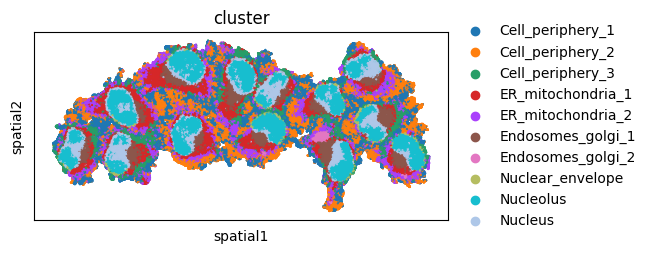

In [108]:
sq.pl.spatial_scatter(four_i, shape=None, color="cluster", size=1)

In [109]:
df = pd.DataFrame(four_i.obs, columns = ["x", "y", "cluster"])

In [111]:
df.to_csv("/Users/brendan/Desktop/PostDoc/work/HuBMAP/repos/multiscale_celltype_colocalization_analysis/data/squidpy/four_i_data.csv")

In [112]:
sq.gr.co_occurrence(four_i, cluster_key="cluster")

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8911/8911 [55:04<00:00,  2.70/s]


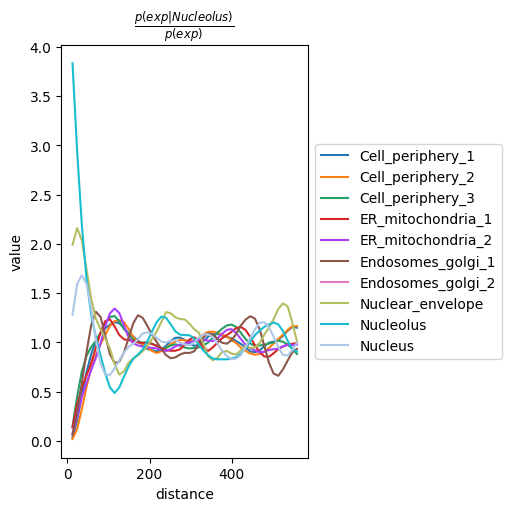

In [113]:
sq.pl.co_occurrence(four_i, cluster_key="cluster", clusters="Nucleolus")

In [114]:
df.shape

(270876, 3)

In [117]:
imc.obsm["spatial"]

array([[  1.70909091,  15.32727273],
       [  3.84946237,  42.07526882],
       [  0.86666667,  50.33333333],
       ...,
       [730.14285714, 636.96428571],
       [730.375     , 658.04166667],
       [729.87628866, 679.63917526]])

In [115]:
imc = sq.datasets.imc()

In [120]:
spatial = imc.obsm["spatial"].astype(np.float32)
spatial

array([[  1.709091 ,  15.327272 ],
       [  3.8494623,  42.075268 ],
       [  0.8666667,  50.333332 ],
       ...,
       [730.1429   , 636.9643   ],
       [730.375    , 658.0417   ],
       [729.8763   , 679.63916  ]], dtype=float32)

In [122]:
original_clust = imc.obs["cell type"]
original_clust

0        apoptotic tumor cell
1        apoptotic tumor cell
2       p53+ EGFR+ tumor cell
3        apoptotic tumor cell
4        apoptotic tumor cell
                ...          
4707     apoptotic tumor cell
4708     apoptotic tumor cell
4709     apoptotic tumor cell
4710    p53+ EGFR+ tumor cell
4711     apoptotic tumor cell
Name: cell type, Length: 4668, dtype: category
Categories (11, object): ['CK low HR low tumor cell', 'CK+ HR+ tumor cell', 'T cells', 'apoptotic tumor cell', ..., 'p53+ EGFR+ tumor cell', 'proliferative tumor cell', 'small elongated stromal cell', 'vimentin hi stromal cell']

In [123]:
clust_map = {v: i for i, v in enumerate(original_clust.cat.categories.values)}
labs = np.array([clust_map[c] for c in original_clust], dtype=np.int32)
labs_unique = np.array(list(clust_map.values()), dtype=np.int32)

In [124]:
labs_unique

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int32)

In [125]:
labs

array([3, 3, 7, ..., 3, 7, 3], dtype=int32)

In [126]:
len(labs)

4668

In [127]:
clust_map

{'CK low HR low tumor cell': 0,
 'CK+ HR+ tumor cell': 1,
 'T cells': 2,
 'apoptotic tumor cell': 3,
 'basal CK tumor cell': 4,
 'endothelial': 5,
 'macrophages': 6,
 'p53+ EGFR+ tumor cell': 7,
 'proliferative tumor cell': 8,
 'small elongated stromal cell': 9,
 'vimentin hi stromal cell': 10}

In [130]:
# _find_min_max
coord_sum = np.sum(spatial, axis=1)
min_idx, min_idx2 = np.argpartition(coord_sum, 2)[:2]
max_idx = np.argmax(coord_sum)
# fmt: off
thres_max = pairwise_distances(spatial[min_idx, :].reshape(1, -1), spatial[max_idx, :].reshape(1, -1))[0, 0] / 2.0
thres_min = pairwise_distances(spatial[min_idx, :].reshape(1, -1), spatial[min_idx2, :].reshape(1, -1))[0, 0]
# fmt: on

thresh_min, thresh_max = thres_min.astype(np.float32), thres_max.astype(np.float32)

In [131]:
coord_sum

array([  17.036364,   45.92473 ,   51.199997, ..., 1367.1072  ,
       1388.4167  , 1409.5154  ], dtype=float32)

In [132]:
min_idx

56

In [133]:
min_idx2

0

In [134]:
max_idx

4608

In [135]:
thres_max

527.6266479492188

In [136]:
thres_min

12.973341

In [137]:
interval = np.linspace(thresh_min, thresh_max, num=50, dtype=np.float32)

In [138]:
interval

array([ 12.973341,  23.476469,  33.9796  ,  44.482727,  54.985855,
        65.48898 ,  75.99211 ,  86.49524 ,  96.99837 , 107.5015  ,
       118.00463 , 128.50775 , 139.01088 , 149.514   , 160.01714 ,
       170.52028 , 181.0234  , 191.52654 , 202.02966 , 212.53279 ,
       223.03592 , 233.53905 , 244.04218 , 254.5453  , 265.04843 ,
       275.55154 , 286.0547  , 296.55783 , 307.06094 , 317.5641  ,
       328.0672  , 338.57034 , 349.07346 , 359.5766  , 370.0797  ,
       380.58286 , 391.08597 , 401.5891  , 412.09222 , 422.59537 ,
       433.09848 , 443.60162 , 454.10474 , 464.60788 , 475.111   ,
       485.61414 , 496.11725 , 506.6204  , 517.12354 , 527.62665 ],
      dtype=float32)

In [139]:
n_obs = spatial.shape[0]

In [140]:
n_obs

4668

In [141]:
size_arr = (n_obs**2 * spatial.itemsize) / 1024 / 1024

In [142]:
size_arr

83.12310791015625

In [143]:
n_splits = 1
n_splits = max(min(n_splits, n_obs), 1)

In [159]:
n_splits = 1

In [160]:
spatial_splits = tuple(s for s in np.array_split(spatial, n_splits, axis=0) if len(s))
labs_splits = tuple(s for s in np.array_split(labs, n_splits, axis=0) if len(s))
# create idx array including unique combinations and self-comparison
x, y = np.triu_indices_from(np.empty((n_splits, n_splits)))
idx_splits = [(i, j) for i, j in zip(x, y)]

In [161]:
spatial_splits

(array([[  1.709091 ,  15.327272 ],
        [  3.8494623,  42.075268 ],
        [  0.8666667,  50.333332 ],
        ...,
        [730.1429   , 636.9643   ],
        [730.375    , 658.0417   ],
        [729.8763   , 679.63916  ]], dtype=float32),)

In [166]:
labs_splits

(array([3, 3, 7, ..., 3, 7, 3], dtype=int32),)

In [163]:
x

array([0])

In [164]:
y

array([0])

In [165]:
idx_splits

[(0, 0)]

In [ ]:
out_lst = parallelize(
        _co_occurrence_helper,
        collection=idx_splits,
        extractor=chain.from_iterable,
        n_jobs=n_jobs,
        backend=backend,
        show_progress_bar=show_progress_bar,
    )(
        spatial_splits=spatial_splits,
        labs_splits=labs_splits,
        labs_unique=labs_unique,
        interval=interval,
    )

only one split in this case
otherwise the dataset is split up but each section is compared to itself and all other sections. So I think you still get to compute distances between all cell combinations and then filter and count those that are within the given interval to compute the probs

In [167]:
idx_x, idx_y = (0,0)
labs_x = labs_splits[idx_x]
labs_y = labs_splits[idx_y]
dist = pairwise_distances(spatial_splits[idx_x], spatial_splits[idx_y])

In [168]:
dist

array([[  0.      ,  26.833494,  35.016193, ..., 957.6264  , 971.61505 ,
        985.66614 ],
       [ 26.833494,   0.      ,   8.780245, ..., 938.8264  , 952.49884 ,
        966.2312  ],
       [ 35.016193,   8.780245,   0.      , ..., 935.93787 , 949.46924 ,
        963.0581  ],
       ...,
       [957.6264  , 938.8264  , 935.93787 , ...,   0.      ,  21.07867 ,
         42.675697],
       [971.61505 , 952.49884 , 949.46924 , ...,  21.07867 ,   0.      ,
         21.60323 ],
       [985.66614 , 966.2312  , 963.0581  , ...,  42.675697,  21.60323 ,
          0.      ]], dtype=float32)

In [279]:
pairwise_distances(spatial, spatial) # should be the same because no splits (or technically just 1)

array([[  0.      ,  26.833494,  35.016193, ..., 957.6264  , 971.61505 ,
        985.66614 ],
       [ 26.833494,   0.      ,   8.780245, ..., 938.8264  , 952.49884 ,
        966.2312  ],
       [ 35.016193,   8.780245,   0.      , ..., 935.93787 , 949.46924 ,
        963.0581  ],
       ...,
       [957.6264  , 938.8264  , 935.93787 , ...,   0.      ,  21.07867 ,
         42.675697],
       [971.61505 , 952.49884 , 949.46924 , ...,  21.07867 ,   0.      ,
         21.60323 ],
       [985.66614 , 966.2312  , 963.0581  , ...,  42.675697,  21.60323 ,
          0.      ]], dtype=float32)

In [169]:
dist.shape

(4668, 4668)

In [ ]:
out = _occur_count((labs_x, labs_y), dist, labs_unique, interval)

In [170]:
interval.shape[0] - 1

49

In [171]:
range(interval.shape[0] - 1)

range(0, 49)

In [172]:
for idx in range(interval.shape[0] - 1):
    print(idx)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48


In [173]:
labs_unique

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int32)

In [175]:
num = labs_unique.shape[0]
num

11

In [178]:
co_occur = np.zeros((num, num), dtype=np.float32)
co_occur

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [179]:
co_occur.shape

(11, 11)

In [181]:
out = np.zeros((num, num, interval.shape[0] - 1), dtype=np.float32)
out

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [182]:
out.shape

(11, 11, 49)

cell type x cell type, for each interval

In [183]:
clust = (labs_x, labs_y)

In [184]:
clust

(array([3, 3, 7, ..., 3, 7, 3], dtype=int32),
 array([3, 3, 7, ..., 3, 7, 3], dtype=int32))

In [185]:
pw_dist = dist

In [195]:
pw_dist.shape

(4668, 4668)

In [196]:
4668*4668

21790224

Lets start exploring the intervals

In [271]:
idx = 48

co_occur = np.zeros((num, num), dtype=np.float32)
probs_con = np.zeros((num, num), dtype=np.float32)
thres_min = interval[idx]
thres_max = interval[idx + 1]
clust_x, clust_y = clust


thres_min = 12.973341 # from the first interval
# thres_min = 517.12354 # from the second interval

idx_x, idx_y = np.nonzero((pw_dist <= thres_max) & (pw_dist > thres_min))
x = clust_x[idx_x]
y = clust_y[idx_y]

I think this gets the indices of the cell combinations in the dist matrix that are within the interval

In [272]:
np.nonzero((pw_dist <= thres_max) & (pw_dist > thres_min))

(array([   0,    0,    0, ..., 4667, 4667, 4667]),
 array([   1,    2,    3, ..., 4664, 4665, 4666]))

In [273]:
thres_min

12.973341

In [274]:
thres_max

527.62665

In [275]:
idx_x

array([   0,    0,    0, ..., 4667, 4667, 4667])

In [276]:
idx_y

array([   1,    2,    3, ..., 4664, 4665, 4666])

In [277]:
idx_x.shape

(15736454,)

In [278]:
idx_y.shape

(15736454,)

I think if the interval includes everything from the reference cell outward, then eventually we should get close to including every cell combo in the dist matrix as we get to the last interval. But don't see that.

To test, held the min_thresh at what it would be for the first interval. And for the last and get a lot more cell that normal.

So each interval is only looking at at cells that are in a particular range. Like a ring with a given inner and outer diameter.

the x and y indices correspond to cells in the dataset (in this case there are 4668)
so we're getting the cells that are within the given interval, and then also getting their cluster membership

In [198]:
x

array([3, 3, 3, ..., 3, 3, 3], dtype=int32)

In [199]:
x.shape

(43482,)

In [201]:
np.unique(x)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int32)

In [200]:
y

array([3, 8, 3, ..., 3, 3, 7], dtype=int32)

In [202]:
for i, j in zip(x, y):
    co_occur[i, j] += 1

populate the co_occurance matrix with the counts of co-occurance of cell types within the defined interval

In [203]:
co_occur

array([[1.0000e+01, 9.0000e+00, 3.2000e+01, 2.8600e+02, 2.5000e+01,
        2.0000e+00, 1.2000e+01, 8.0000e+00, 1.0000e+01, 2.0000e+00,
        5.0000e+00],
       [9.0000e+00, 2.0000e+01, 2.6000e+01, 4.2900e+02, 6.3000e+01,
        8.0000e+00, 2.2000e+01, 1.4000e+01, 1.2000e+01, 1.9000e+01,
        1.4000e+01],
       [3.2000e+01, 2.6000e+01, 5.7200e+02, 1.1990e+03, 9.1000e+01,
        1.4500e+02, 2.5900e+02, 6.1000e+01, 6.8000e+01, 9.0000e+01,
        1.2200e+02],
       [2.8600e+02, 4.2900e+02, 1.1990e+03, 2.2792e+04, 1.6340e+03,
        2.8600e+02, 7.1600e+02, 1.1220e+03, 6.5100e+02, 3.0100e+02,
        2.6500e+02],
       [2.5000e+01, 6.3000e+01, 9.1000e+01, 1.6340e+03, 1.2400e+03,
        2.4000e+01, 9.8000e+01, 6.7000e+01, 7.5000e+01, 7.8000e+01,
        2.7000e+01],
       [2.0000e+00, 8.0000e+00, 1.4500e+02, 2.8600e+02, 2.4000e+01,
        4.4000e+01, 8.9000e+01, 1.1000e+01, 1.9000e+01, 3.2000e+01,
        4.6000e+01],
       [1.2000e+01, 2.2000e+01, 2.5900e+02, 7.1600e+02, 9.

In [204]:
np.sum(co_occur)

43482.0

normalize co_occurance matrix by number of occurances in the interval
note that stuff gets counted multiple times depending on the reference cell
because we do this for every cell combination that is within the interval distance

this is the frequency of seeing each of the different combinations:
A given reference cell type and seeing a given query cell type

In [205]:
probs_matrix = co_occur / np.sum(co_occur)

In [206]:
probs_matrix

array([[2.2998021e-04, 2.0698219e-04, 7.3593669e-04, 6.5774345e-03,
        5.7495054e-04, 4.5996043e-05, 2.7597626e-04, 1.8398417e-04,
        2.2998021e-04, 4.5996043e-05, 1.1499011e-04],
       [2.0698219e-04, 4.5996043e-04, 5.9794856e-04, 9.8661520e-03,
        1.4488754e-03, 1.8398417e-04, 5.0595647e-04, 3.2197230e-04,
        2.7597626e-04, 4.3696241e-04, 3.2197230e-04],
       [7.3593669e-04, 5.9794856e-04, 1.3154869e-02, 2.7574629e-02,
        2.0928201e-03, 3.3347132e-03, 5.9564877e-03, 1.4028794e-03,
        1.5638655e-03, 2.0698220e-03, 2.8057587e-03],
       [6.5774345e-03, 9.8661520e-03, 2.7574629e-02, 5.2417094e-01,
        3.7578769e-02, 6.5774345e-03, 1.6466584e-02, 2.5803780e-02,
        1.4971713e-02, 6.9224047e-03, 6.0944757e-03],
       [5.7495054e-04, 1.4488754e-03, 2.0928201e-03, 3.7578769e-02,
        2.8517548e-02, 5.5195251e-04, 2.2538062e-03, 1.5408675e-03,
        1.7248517e-03, 1.7938457e-03, 6.2094658e-04],
       [4.5996043e-05, 1.8398417e-04, 3.3347132e-0

In [207]:
probs = np.sum(probs_matrix, axis=1)

this is now the probability of seeing each of these cell types if you are within the interval in general

In [208]:
probs

array([0.00922221, 0.01462674, 0.06128973, 0.6826043 , 0.07869924,
       0.0162366 , 0.04758291, 0.03401407, 0.02345798, 0.01662757,
       0.01563866], dtype=float32)

In [209]:
np.sum(probs)

1.0000001

In [210]:
labs_unique

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int32)

In [211]:
c = 0

In [212]:
co_occur[c]

array([ 10.,   9.,  32., 286.,  25.,   2.,  12.,   8.,  10.,   2.,   5.],
      dtype=float32)

in this example, the first cell type and the first vector in the array
it's the counts of query cells seen around cells of cell type 0 within the interval

In [214]:
np.sum(co_occur[c])

401.0

the total counts of all cells around cells of cell type 0

In [215]:
probs_conditional = co_occur[c] / np.sum(co_occur[c])

In [216]:
probs_conditional

array([0.02493766, 0.02244389, 0.0798005 , 0.71321696, 0.06234414,
       0.00498753, 0.02992519, 0.01995013, 0.02493766, 0.00498753,
       0.01246883], dtype=float32)

normalized. So the probability of seeing a given query cell type given the reference cell type 0

compare the conditional probability to that of seeing one of the query cell types in general at that interval distance

In [217]:
probs_con[c, :] = probs_conditional / probs

In [218]:
probs_con

array([[2.7040877 , 1.5344422 , 1.3020208 , 1.0448469 , 0.79218227,
        0.30717826, 0.6289062 , 0.5865256 , 1.0630776 , 0.29995555,
        0.7973082 ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.

In [219]:
probs_con.shape

(11, 11)

fill up each row of the probs_con matrix. each row is a reference cell type

In [ ]:
out[:, :, idx] = probs_con

and we also iterate through each interval too and fill up the out matrix accordingly

So if this is true, and I confirm by visualizing the cells that are within a given interval from one particular cell?

I use the inverval to select the cells in the dist matrix, and then take one particular cell as a reference. 

Plot the reference cell and the cells that are within the interval. This should prove once and for all what it is doing in terms of the intervals

In [129]:
from sklearn.metrics import pairwise_distances

In [ ]:
def _occur_count(
    clust: tuple[NDArrayA, NDArrayA],
    pw_dist: NDArrayA,
    labs_unique: NDArrayA,
    interval: NDArrayA,
) -> NDArrayA:
    num = labs_unique.shape[0]
    out = np.zeros((num, num, interval.shape[0] - 1), dtype=ft)

    for idx in range(interval.shape[0] - 1):
        co_occur = np.zeros((num, num), dtype=ft)
        probs_con = np.zeros((num, num), dtype=ft)

        thres_min = interval[idx]
        thres_max = interval[idx + 1]
        clust_x, clust_y = clust

        idx_x, idx_y = np.nonzero((pw_dist <= thres_max) & (pw_dist > thres_min))
        x = clust_x[idx_x]
        y = clust_y[idx_y]
        for i, j in zip(x, y):
            co_occur[i, j] += 1

        probs_matrix = co_occur / np.sum(co_occur)
        probs = np.sum(probs_matrix, axis=1)

        for c in labs_unique:
            probs_conditional = co_occur[c] / np.sum(co_occur[c])
            probs_con[c, :] = probs_conditional / probs

        out[:, :, idx] = probs_con

    return out

In [ ]:
def _co_occurrence_helper(
    idx_splits: Iterable[tuple[int, int]],
    spatial_splits: Sequence[NDArrayA],
    labs_splits: Sequence[NDArrayA],
    labs_unique: NDArrayA,
    interval: NDArrayA,
    queue: SigQueue | None = None,
) -> pd.DataFrame:

    out_lst = []
    for t in idx_splits:
        idx_x, idx_y = t
        labs_x = labs_splits[idx_x]
        labs_y = labs_splits[idx_y]
        dist = pairwise_distances(spatial_splits[idx_x], spatial_splits[idx_y])

        out = _occur_count((labs_x, labs_y), dist, labs_unique, interval)
        out_lst.append(out)

        if queue is not None:
            queue.put(Signal.UPDATE)

    if queue is not None:
        queue.put(Signal.FINISH)

    return out_lst

In [ ]:
def co_occurrence(
    adata: AnnData,
    cluster_key: str,
    spatial_key: str = Key.obsm.spatial,
    interval: int | NDArrayA = 50,
    copy: bool = False,
    n_splits: int | None = None,
    n_jobs: int | None = None,
    backend: str = "loky",
    show_progress_bar: bool = True,
) -> tuple[NDArrayA, NDArrayA] | None:
    """
    Compute co-occurrence probability of clusters.

    Parameters
    ----------
    %(adata)s
    %(cluster_key)s
    %(spatial_key)s
    interval
        Distances interval at which co-occurrence is computed. If :class:`int`, uniformly spaced interval
        of the given size will be used.
    %(copy)s
    n_splits
        Number of splits in which to divide the spatial coordinates in
        :attr:`anndata.AnnData.obsm` ``['{spatial_key}']``.
    %(parallelize)s

    Returns
    -------
    If ``copy = True``, returns the co-occurrence probability and the distance thresholds intervals.

    Otherwise, modifies the ``adata`` with the following keys:

        - :attr:`anndata.AnnData.uns` ``['{cluster_key}_co_occurrence']['occ']`` - the co-occurrence probabilities
          across interval thresholds.
        - :attr:`anndata.AnnData.uns` ``['{cluster_key}_co_occurrence']['interval']`` - the distance thresholds
          computed at ``interval``.
    """
    _assert_categorical_obs(adata, key=cluster_key)
    _assert_spatial_basis(adata, key=spatial_key)

    spatial = adata.obsm[spatial_key].astype(fp)
    original_clust = adata.obs[cluster_key]

    # annotate cluster idx
    clust_map = {v: i for i, v in enumerate(original_clust.cat.categories.values)}
    labs = np.array([clust_map[c] for c in original_clust], dtype=ip)
    labs_unique = np.array(list(clust_map.values()), dtype=ip)

    # create intervals thresholds
    if isinstance(interval, int):
        thresh_min, thresh_max = _find_min_max(spatial)
        interval = np.linspace(thresh_min, thresh_max, num=interval, dtype=fp)
    else:
        interval = np.array(sorted(interval), dtype=fp, copy=True)
    if len(interval) <= 1:
        raise ValueError(f"Expected interval to be of length `>= 2`, found `{len(interval)}`.")

    n_obs = spatial.shape[0]
    if n_splits is None:
        size_arr = (n_obs**2 * spatial.itemsize) / 1024 / 1024  # calc expected mem usage
        if size_arr > 2000:
            n_splits = 1
            while 2048 < (n_obs / n_splits):
                n_splits += 1
            logg.warning(
                f"`n_splits` was automatically set to `{n_splits}` to "
                f"prevent `{n_obs}x{n_obs}` distance matrix from being created"
            )
        else:
            n_splits = 1
    n_splits = max(min(n_splits, n_obs), 1)

    # split array and labels
    spatial_splits = tuple(s for s in np.array_split(spatial, n_splits, axis=0) if len(s))
    labs_splits = tuple(s for s in np.array_split(labs, n_splits, axis=0) if len(s))
    # create idx array including unique combinations and self-comparison
    x, y = np.triu_indices_from(np.empty((n_splits, n_splits)))
    idx_splits = [(i, j) for i, j in zip(x, y)]

    n_jobs = _get_n_cores(n_jobs)
    start = logg.info(
        f"Calculating co-occurrence probabilities for `{len(interval)}` intervals "
        f"`{len(idx_splits)}` split combinations using `{n_jobs}` core(s)"
    )

    out_lst = parallelize(
        _co_occurrence_helper,
        collection=idx_splits,
        extractor=chain.from_iterable,
        n_jobs=n_jobs,
        backend=backend,
        show_progress_bar=show_progress_bar,
    )(
        spatial_splits=spatial_splits,
        labs_splits=labs_splits,
        labs_unique=labs_unique,
        interval=interval,
    )
    out = list(out_lst)[0] if len(idx_splits) == 1 else sum(list(out_lst)) / len(idx_splits)

    if copy:
        logg.info("Finish", time=start)
        return out, interval

    _save_data(
        adata, attr="uns", key=Key.uns.co_occurrence(cluster_key), data={"occ": out, "interval": interval}, time=start
    )

In [128]:
def _find_min_max(spatial: NDArrayA) -> tuple[float, float]:
    coord_sum = np.sum(spatial, axis=1)
    min_idx, min_idx2 = np.argpartition(coord_sum, 2)[:2]
    max_idx = np.argmax(coord_sum)
    # fmt: off
    thres_max = pairwise_distances(spatial[min_idx, :].reshape(1, -1), spatial[max_idx, :].reshape(1, -1))[0, 0] / 2.0
    thres_min = pairwise_distances(spatial[min_idx, :].reshape(1, -1), spatial[min_idx2, :].reshape(1, -1))[0, 0]
    # fmt: on

    return thres_min.astype(fp), thres_max.astype(fp)

NameError: name 'NDArrayA' is not defined

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:22<00:00, 44.45/s]


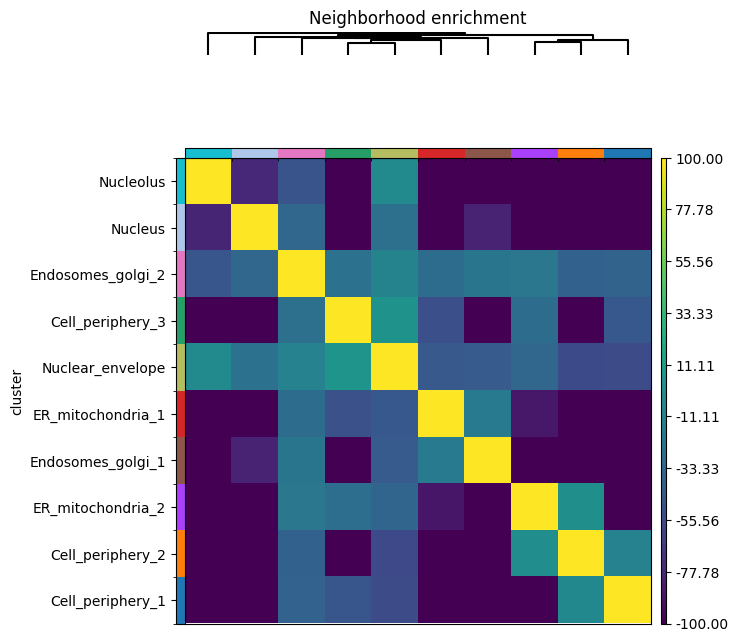

In [290]:
sq.gr.spatial_neighbors(four_i, coord_type="generic")
sq.gr.nhood_enrichment(four_i, cluster_key="cluster")
sq.pl.nhood_enrichment(four_i, cluster_key="cluster", method="ward", vmin=-100, vmax=100)

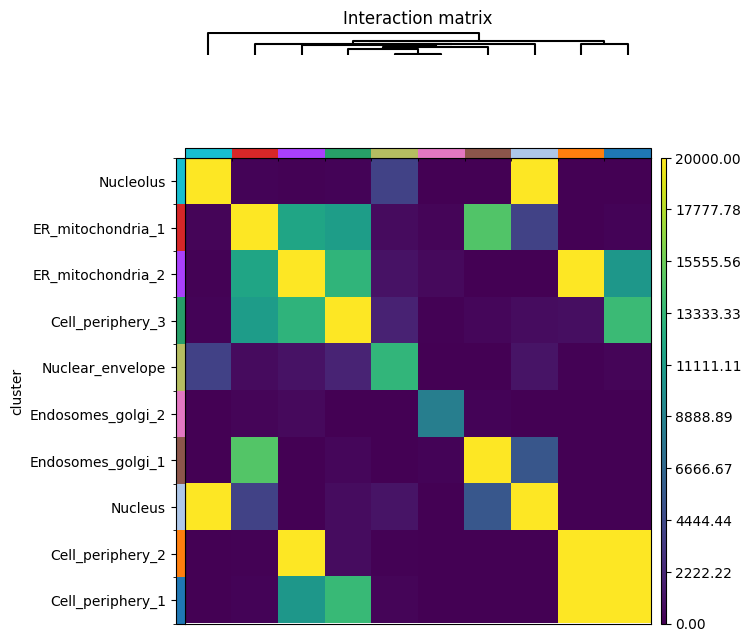

In [291]:
sq.gr.interaction_matrix(four_i, cluster_key="cluster")
sq.pl.interaction_matrix(four_i, cluster_key="cluster", method="ward", vmax=20000)

going to take very long likely cause of the same issue I ran into

In [292]:
sq.gr.spatial_neighbors(four_i, coord_type="generic", radius=50, key_added='spatial_distances')
sq.gr.nhood_enrichment(four_i, cluster_key="cluster", connectivity_key='spatial_distances')
sq.pl.nhood_enrichment(four_i, cluster_key="cluster", method="single", cmap="inferno", vmin=-50, vmax=100)

KeyboardInterrupt: 